In [24]:

import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, VisImage
from detectron2.data import MetadataCatalog, DatasetCatalog
from matplotlib import pyplot as plt
import glob
from detectron2.data.datasets.coco import convert_to_coco_json
from detectron2.solver import build_lr_scheduler
from vis import *
from dataset_bjtu import *

import torch
from detectron2.engine import DefaultTrainer
from eval_func import *

print(torch.cuda.is_available())
print(torch.cuda.get_device_capability())
os.environ["CUDA_VISIBLE_DEVICES"] = "1,"



True
(9, 0)


In [4]:
cfg = get_cfg()
cfg.merge_from_file("config/hit.yaml")
CHECK_DIR = "result/baseline_faster_r50_b16_s250_washed"


In [5]:


eval(cfg, "bjtu_test_washed", CHECK_DIR)

[06/19 01:53:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from result/baseline_faster_r50_b16_s250_washed/model_final.pth ...
WARNING [06/19 01:53:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/19 01:53:58 d2.data.datasets.coco]: Loaded 153 images in COCO format from BJTU_washed/test.json
[06/19 01:53:58 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/19 01:53:58 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/19 01:53:58 d2.data.common]: Serializing 153 elements to byte tensors and concatenating them all ...
[06/19 01:53:58 d2.data.common]: Serialized dataset takes 0.04 MiB
[06/19 01:53:58 d2.evaluation.evaluator]: Start inference on 153 batches
[06/19 01:53:58 d2.evaluation.evaluator]: Inference done 11/153. Da

In [4]:
"""
Show single file
"""

outputs = check_single(cfg, "bjtu_test_washed", weight_dir=CHECK_DIR)

WARNING [06/19 01:57:03 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/19 01:57:03 d2.data.datasets.coco]: Loaded 153 images in COCO format from BJTU_washed/test.json
[06/19 01:57:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from result/baseline_faster_r50_b16_s250_washed/model_final.pth ...
{'file_name': './BJTU_washed/test/mh-a8f6s.png', 'height': 768, 'width': 576, 'image_id': 30, 'annotations': [{'iscrowd': 0, 'bbox': [270.0, 175.0, 60.0, 113.0], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


/mnt/data131/gyk/envs/lib/python3.8/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'file_name': './BJTU_washed/test/nm-ygdwgya5545.jpg', 'height': 532, 'width': 800, 'image_id': 66, 'annotations': [{'iscrowd': 0, 'bbox': [281.0, 70.0, 237.0, 92.0], 'category_id': 0, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
{'file_name': './BJTU_washed/test/sjz-ajkshduih12.jpg', 'height': 992, 'width': 744, 'image_id': 75, 'annotations': [{'iscrowd': 0, 'bbox': [241.0, 346.0, 286.0, 146.0], 'category_id': 0, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
{'file_name': './BJTU_washed/test/sjz-dsjjakl22.jpg', 'height': 756, 'width': 1008, 'image_id': 78, 'annotations': [{'iscrowd': 0, 'bbox': [387.0, 199.0, 338.0, 141.0], 'category_id': 0, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
{'file_name': './BJTU_washed/test/zx-9754878fa823ffcbebedb39368bad70.jpg', 'height': 685, 'width': 1024, 'image_id': 150, 'annotations': [{'iscrowd': 0, 'bbox': [561.0, 103.0, 186.0, 367.0], 'category_id': 5, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
{'file_name': './BJTU_washed/test/zx-0e1c7605e7e76d08e5691e8258a7096.jpg', 'hei

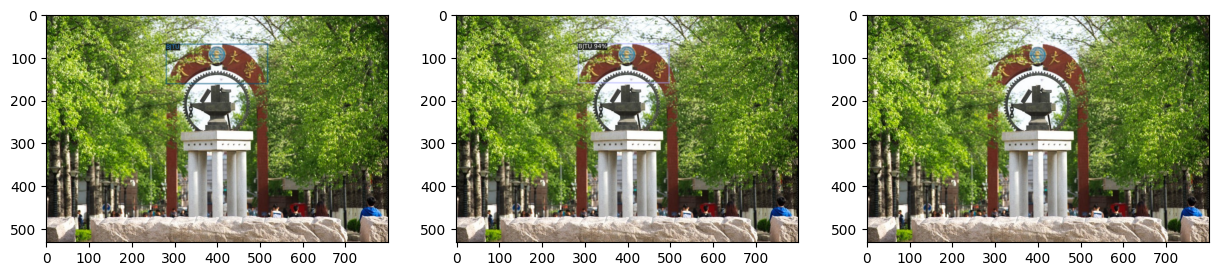

In [8]:

show_batch(outputs, 1)

[06/19 21:25:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from result/ab_base/model_final.pth ...
[06/19 21:25:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from result/ab_trans_only/model_final.pth ...
[06/19 21:25:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from result/ab_aug_only/model_final.pth ...
[06/19 21:25:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from result/final_r50_b4_s3000_rc3/model_final.pth ...


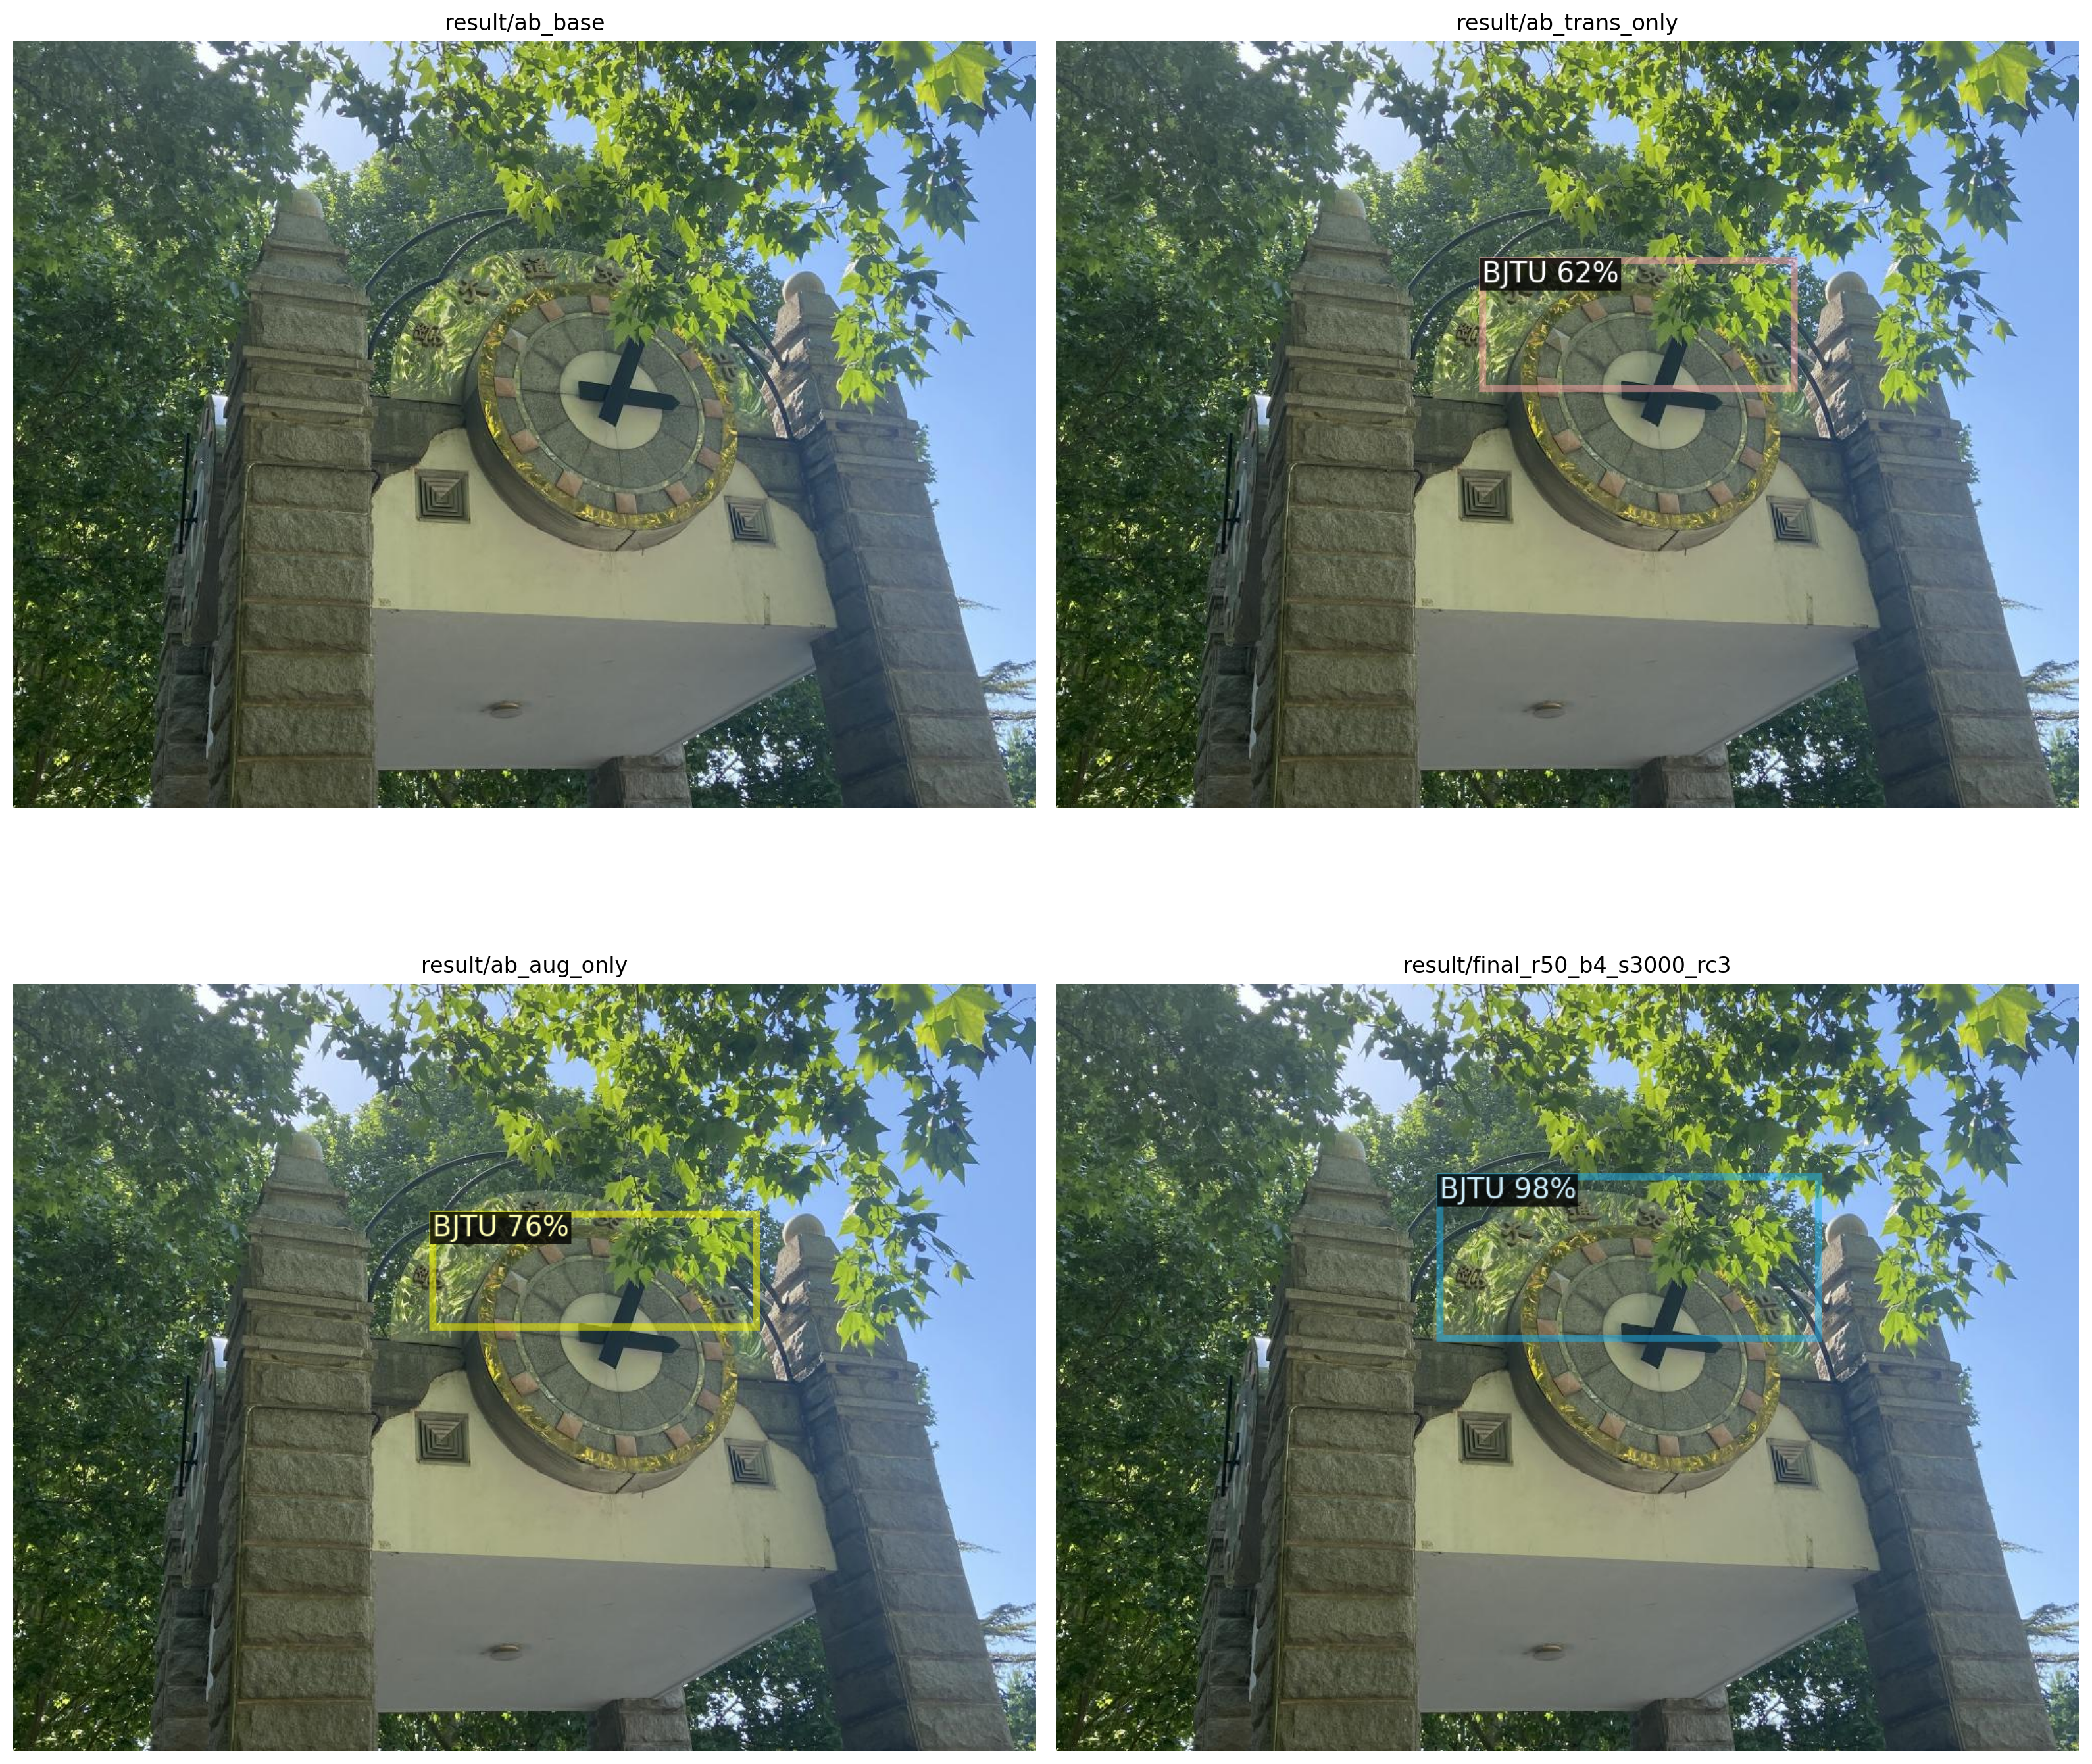

In [41]:
def predict_img(cfg, img, weight_dir=None, threshold=0.5):
    
    cfg = cfg.clone()
    out_imgs = []
    v = Visualizer(
            img[:, :, ::-1],
            metadata=MetadataCatalog.get("bjtu_test_washed"),
            scale=1,
        )
    for weight in weight_dir:
        cfg.MODEL.WEIGHTS = os.path.join(weight, "model_final.pth")
        cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshold
        predictor = DefaultPredictor(cfg)
        outputs = predictor(img)
        
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        out_imgs.append([out.get_image()[:, :, ::-1], weight]) 
        v.output = VisImage(img[:, :, ::-1], scale=1)
        
    return out_imgs
img_path = "BJTU_washed/test/sjz-dsjjakl22.jpg"
outputs = predict_img(cfg, cv2.imread(img_path)[:, :, ::-1], ["result/ab_base","result/ab_trans_only", "result/ab_aug_only","result/final_r50_b4_s3000_rc3", ], 0.5)

plt.figure(figsize=(16, 16))  # 创建一个宽幅图形窗口

for i, (img, weight) in enumerate(outputs):
    plt.subplot(2, 2, i + 1)  # 创建 1 行 4 列的子图，并选择第 i + 1 个
    plt.imshow(img)
    plt.title(weight)
    plt.axis('off')  # 关闭坐标轴
plt.subplots_adjust(hspace=0, wspace=0.1)  # 调整子图之间的间距
plt.tight_layout()  # 调整整体空白
plt.show()  # 在所有子图绘制完后显示图形
# plt.rcParams['figure.figsize'] = (10, 8)
# plt.rcParams['figure.dpi'] = 200
# plt.imshow(pred_img)